In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
# Loading local and global temp data
local_temp_data = pd.read_csv('local_temp_data.csv')
global_temp_data = pd.read_csv('global_temp_data.csv')

In [7]:
local_temp_data.head()

,year,city,country,avg_temp
0,1796,Hyderabad,India,26.53
1,1797,Hyderabad,India,27.48
2,1798,Hyderabad,India,26.20
3,1799,Hyderabad,India,26.84
4,1800,Hyderabad,India,26.88


In [8]:
global_temp_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [9]:
global_temp_data.drop(index = [x for x in range(46)], axis = 0, inplace = True)

In [15]:
global_temp_data.index = local_temp_data.index

In [16]:
global_temp_data.head()


,year,avg_temp
0,1796,8.27
1,1797,8.51
2,1798,8.67
3,1799,8.51
4,1800,8.48


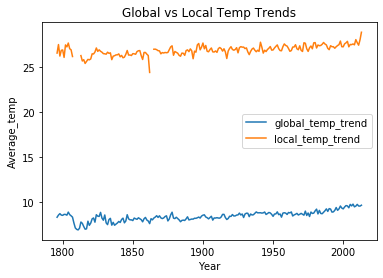

In [17]:
# Visualize global and local temp trends
plt.plot(global_temp_data['year'], global_temp_data['avg_temp'], label = 'global_temp_trend')
plt.plot(local_temp_data['year'], local_temp_data['avg_temp'], label = 'local_temp_trend')
plt.xlabel('Year')
plt.ylabel('Average_temp')
plt.title('Global vs Local Temp Trends')
plt.legend()
plt.show()

# Observation:

As we can see there are lot of spikes when we plot temperature trends for avg_temp per year and this makes difficult to analyze temperature trends. Hence we go for moving averages.

In [18]:
# Calculate moving averages using rolling function
local_temp_data['moving_avg'] = local_temp_data['avg_temp'].rolling(10).mean()
global_temp_data['moving_avg'] = global_temp_data['avg_temp'].rolling(10).mean()

In [19]:
local_temp_data.head()

,year,city,country,avg_temp,moving_avg
0,1796,Hyderabad,India,26.53,NaN
1,1797,Hyderabad,India,27.48,NaN
2,1798,Hyderabad,India,26.20,NaN
3,1799,Hyderabad,India,26.84,NaN
4,1800,Hyderabad,India,26.88,NaN


In [20]:
global_temp_data.head()

,year,avg_temp,moving_avg
0,1796,8.27,NaN
1,1797,8.51,NaN
2,1798,8.67,NaN
3,1799,8.51,NaN
4,1800,8.48,NaN


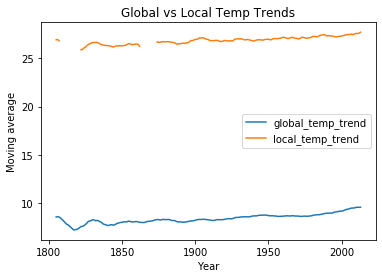

In [21]:
# Visualize global and local temp trends using moving averages
plt.plot(global_temp_data['year'], global_temp_data['moving_avg'], label = 'global_temp_trend')
plt.plot(local_temp_data['year'], local_temp_data['moving_avg'], label = 'local_temp_trend')
plt.xlabel('Year')
plt.ylabel('Moving average')
plt.title('Global vs Local Temp Trends')
plt.legend()
plt.show()

# Observation

In [22]:
# Calculate difference in moving averages
global_temp_data['diff_moving_avg'] = local_temp_data['moving_avg'] - global_temp_data['moving_avg']

In [23]:
global_temp_data

,year,avg_temp,moving_avg,diff_moving_avg
0,1796,8.27,NaN,NaN
1,1797,8.51,NaN,NaN
2,1798,8.67,NaN,NaN
3,1799,8.51,NaN,NaN
4,1800,8.48,NaN,NaN
...,...,...,...,...
213,2009,9.51,9.493,18.059
214,2010,9.70,9.543,18.055
215,2011,9.52,9.554,18.029
216,2012,9.51,9.548,18.070


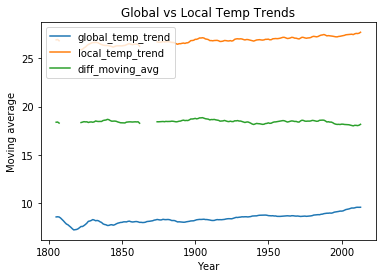

In [24]:
# Visualize global, local temp trends and diff_moving_avg
plt.plot(global_temp_data['year'], global_temp_data['moving_avg'], label = 'global_temp_trend')
plt.plot(local_temp_data['year'], local_temp_data['moving_avg'], label = 'local_temp_trend')
plt.plot(global_temp_data['year'], global_temp_data['diff_moving_avg'], label = 'diff_moving_avg')
plt.xlabel('Year')
plt.ylabel('Moving average')
plt.title('Global vs Local Temp Trends')
plt.legend()
plt.show()

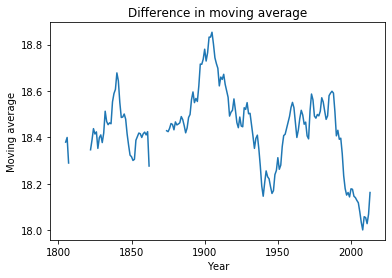

In [25]:
# Visualize diff_moving_avg
plt.plot(global_temp_data['year'], global_temp_data['diff_moving_avg'])
plt.xlabel('Year')
plt.ylabel('Moving average')
plt.title('Difference in moving average')
plt.show()

# Observations

1)On average, temperature for local(Hyderabad) is higher compared to the global, which means the city I live in is hotter   compared to the global.

   .And this trend is consistent over time which can be seen for years 1800s - 2000s


2)At first glance from the green line in above visual, which indicates the difference in moving average for local and 
global temperature shows that the rate of change of temperature for Hyderabad compared with global is almost same for all years.
   .But when you dig in, to see whats happening with difference in moving averages closely
   .It fluctuates between 18ºC and 19ºC.
   .Observing closely reveals that from 1900s there is drop in rate of change of temperature of Hyderabad compared with        global.  
  
3)Looking at the overall trend it looks like world is getting hotter because the curves keep on rising as years          progressing. 
  
  .And this trend is consistent for the last few hundred years.
  
4)Looking at the visual it is found that most of the countries are cooler as compared to where I live, that is because the region I live comes under the tropical region which occupies small region on Earth as compared.
  